#### Traitement des données de langages et de genre

Nous avonns vu précédemment que les données linguistiques binarisées nous donnait 43 colonnes, et que les données de genre binarisées, elles, comportaient 19 variables. Ainsi, ces couvrent données couvrent à elles seules 62/70 features, soit environ 89% du nombre total de données.

Pour éviter donc d'avoir un trop grand nombre de variables, ce qui pourrait ralentir notre modèle en plus d'altérer la qualité de ses prédictions, nous allons donc :
* visualiser les sommes cumulatives des nombre de films par langue et par genre, classés en ordre décroissant,
* regarder la heatmap de corrélation entre les différentes langues et genres, et notre variable cible.

Nous saurons donc ainsi si nous pouvons fusionner des variables sans perte d'information importante, et si oui, lesquelles.

Text(0, 0.5, 'Nombre de films')

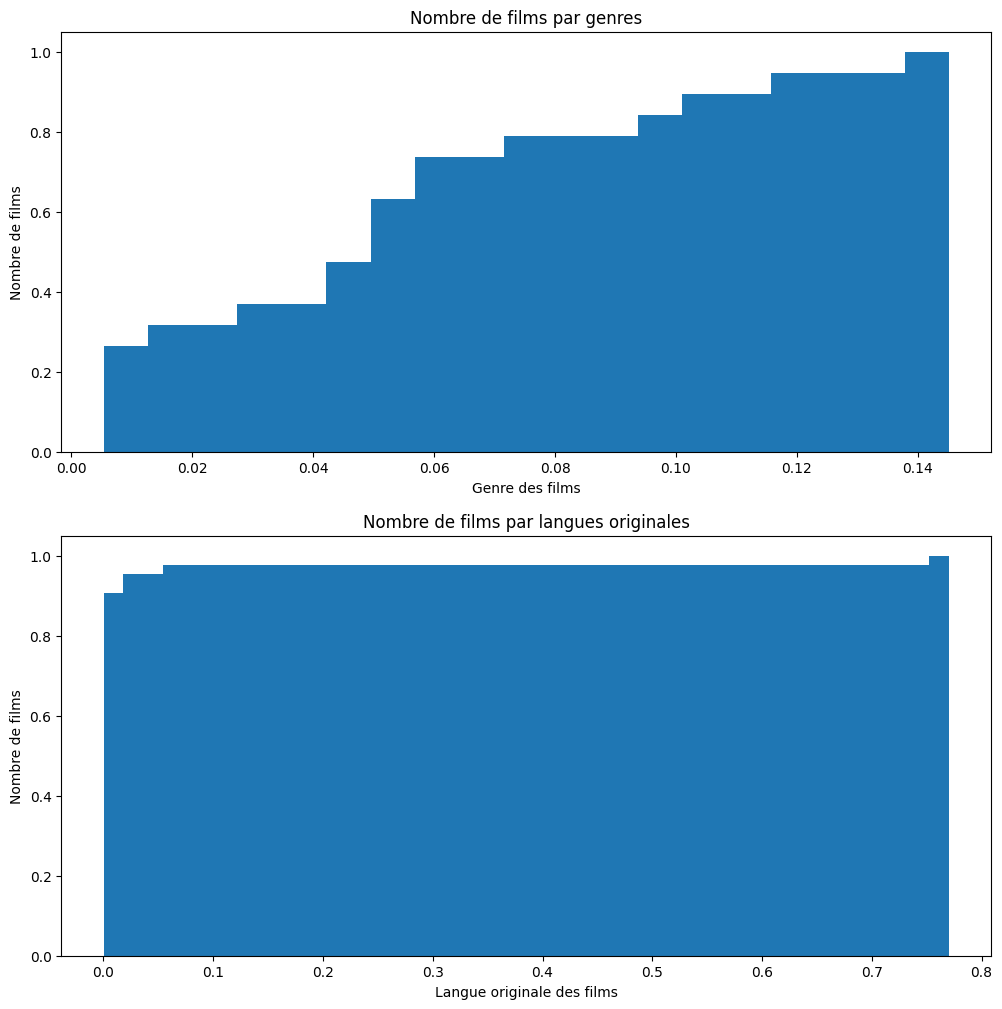

In [5]:
# Sommes cumulatives

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_languages = pd.read_csv("9000plus_languages.csv")
df_genres = pd.read_csv("9000plus_genres.csv")

df_languages = df_languages.drop(columns=["Unnamed: 0"])
df_genres = df_genres.drop(columns=["Unnamed: 0"])

languages_scores = df_languages.sum(axis=0).T
languages_sum = languages_scores.sum(axis=0)
languages_scores = languages_scores.apply(lambda x : x/languages_sum).sort_values(ascending=False)
languages_scores = languages_scores.reset_index(name= "Pourcentage")
languages_scores = languages_scores.rename(columns={"index":"Original_Language"})

genres_scores = df_genres.sum(axis=0).T
genres_sum = genres_scores.sum(axis=0)
genres_scores = genres_scores.apply(lambda x : x/genres_sum).sort_values(ascending=False)
genres_scores = genres_scores.reset_index(name="Pourcentage")
genres_scores = genres_scores.rename(columns={"index":"Genre"})

plt.figure(figsize= (12,12))

# Graphique du genre
plt.subplot(211)
plt.hist(genres_scores["Pourcentage"], 19, density=True, cumulative=True, label="Genre")
plt.title("Nombre de films par genres")
plt.xlabel("Genre des films")
plt.ylabel("Nombre de films")

# Graphique linguistique
plt.subplot(212)
plt.hist(languages_scores["Pourcentage"], 43, density=True, cumulative=True, label="Original_Language")
plt.title("Nombre de films par langues originales")
plt.xlabel("Langue originale des films")
plt.ylabel("Nombre de films")

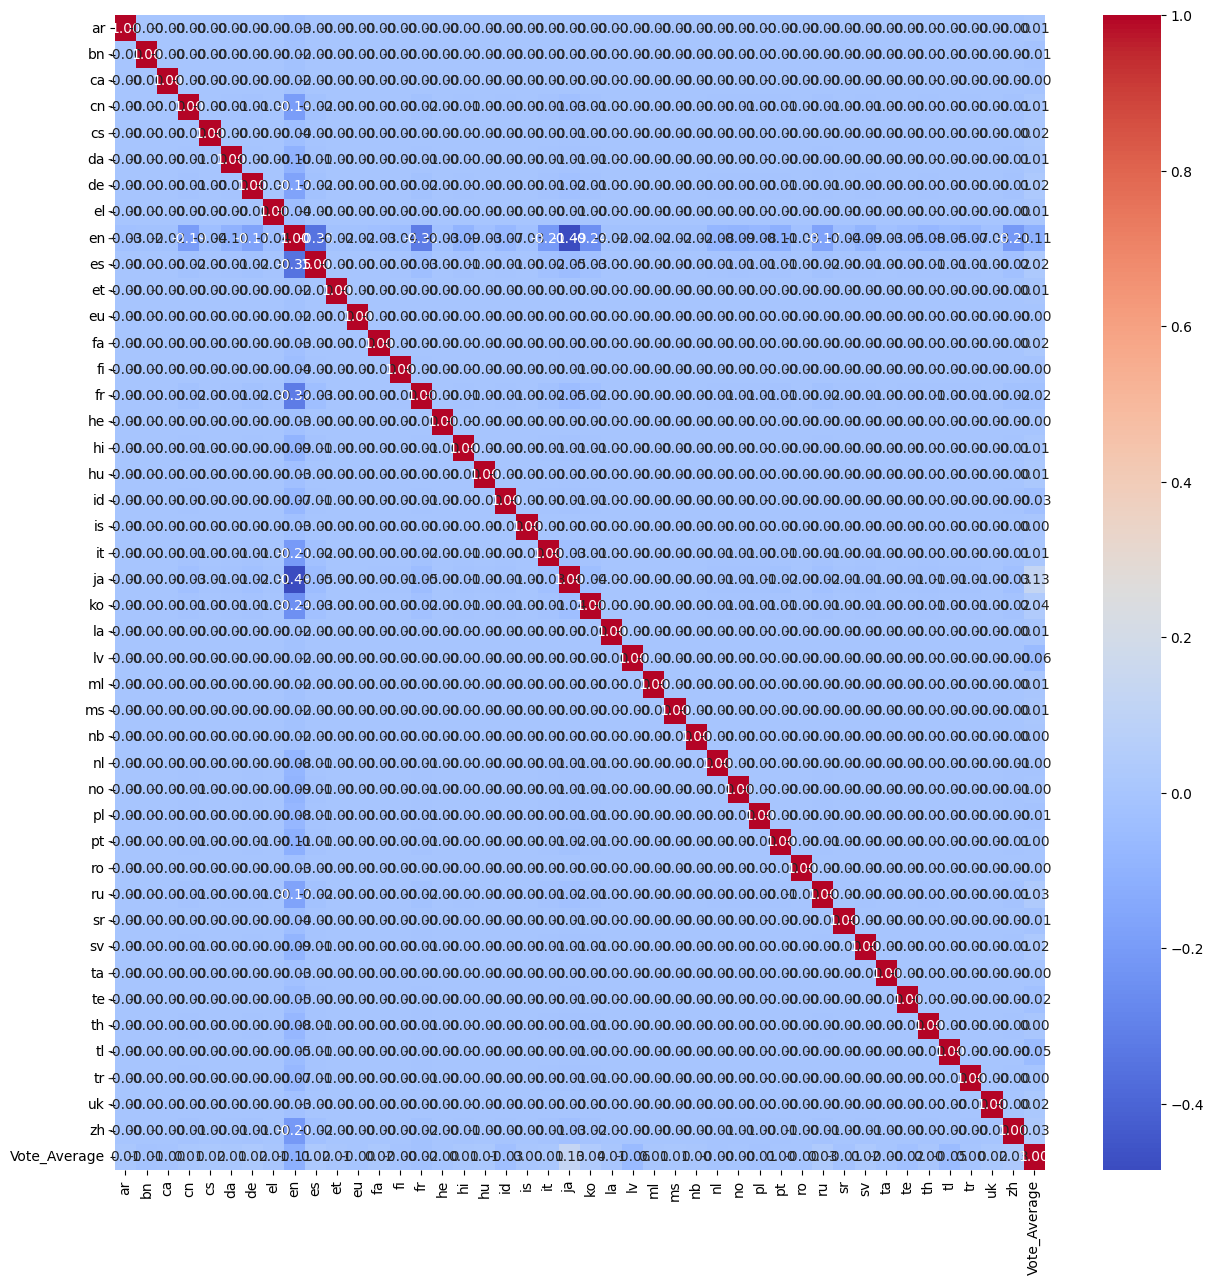

In [6]:
df = pd.read_csv("9000plus_2.csv") # Chargement du dataset complet actuel

# Suppression de l'ancien index
df = df.drop(columns=["Unnamed: 0"])

# Heatmap de corrélation des langues
languages_corr = pd.concat([df_languages,df['Vote_Average']], axis=1) # Pas de corrélation forte entre la variable cible et les languees
genres_corr = pd.concat([df_genres,df['Vote_Average']], axis=1) # La seule corrélation forte est entre "Famille" et "Animation"

plt.figure(figsize=(15,15))
sns.heatmap(languages_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

Compte tenu de l'absence de corrélation forte avec la variable cible, nous ne supprimerons pas de variables.

Les variables de genre ayant des proportions significatives, nous déciderons de toutes les garder.

En revanche, étant donné :
* la somme cumulative du nombre de films par genre,
* le fait que les variables soient mutuellement exclusives (un film ne peut pas avoir 2 Langues originales),
* et parce que beaucoup de catégories linguistiques ne représent que peu de films,

nous allons donc créer une catégorie *Other_languages* afin de réduire drastiquement le nombre de variables linguistiques évaluées.

In [7]:
# Création "Other_languages"
over_10 = languages_scores.iloc[10:,:].reset_index(drop=True)
others = list(over_10["Original_Language"])
df_languages["Other_languages"] = df_languages[others].sum(axis=1)

# Suppression des colonnes minoritaires
df_languages = df_languages.drop(columns=others)
df_languages

# Sauvegarde
df_languages.to_csv("9000plus_lg_reduced.csv")